# Теория вероятностей

Теория вероятностей — это математический аппарат для работы со случайными событиями. Она позволяет нам количественно оценить шансы того или иного исхода.

## Вероятность, условная вероятность, правило Байеса

### Вероятность

**Вероятность** — это число от 0 до 1, которое показывает, насколько вероятно наступление некоторого события.
*   0 — событие невозможно.
*   1 — событие достоверно (произойдет точно).
*   0.5 — событие равновероятно (например, выпадение "орла" при подбрасывании честной монетки).

Классическая формула:
$$
P(A) = \frac{\text{Количество благоприятных исходов}}{\text{Общее количество всех возможных исходов}}
$$

**Пример:** Какова вероятность вытащить туза из стандартной колоды в 52 карты?

В колоде 4 туза (благоприятные исходы) и 52 карты (все исходы).
$P(\text{Туз}) = \frac{4}{52} = \frac{1}{13} \approx 0.077$

### Условная вероятность

**Условная вероятность** — это вероятность наступления события A, *при условии, что событие B уже произошло*. Обозначается как $P(A|B)$.

**Пример:** Какова вероятность вытащить второго туза, если мы уже вытащили одного и не вернули его в колоду?

Теперь в колоде осталось 51 карта, и только 3 из них — тузы.

$P(\text{Второй туз} | \text{Первый был туз}) = \frac{3}{51} = \frac{1}{17} \approx 0.059$

Знание о том, что первое событие произошло, изменило наши шансы.

Формула условной вероятности:

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

Где $P(A \cap B)$ — это вероятность того, что оба события A и B произойдут вместе.

### Правило Байеса (Теорема Байеса)

Это одна из самых важных теорем в науке о данных. Она позволяет "перевернуть" условную вероятность. Если мы знаем $P(A|B)$, то с помощью теоремы Байеса мы можем найти $P(B|A)$.

**Аналогия:**
*   Вы знаете, какова вероятность того, что у человека с редкой болезнью будет положительный тест ($P(\text{Тест+}| \text{Болезнь})$).
*   Но вам, как врачу, нужно знать другое: какова вероятность, что человек *действительно болен*, если его тест оказался положительным ($P(\text{Болезнь} | \text{Тест+})$)?

Теорема Байеса связывает эти вероятности:

$$
P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}
$$

Эта теорема — основа для байесовской статистики, спам-фильтров и многих алгоритмов машинного обучения.

## Случайные величины

**Случайная величина** — это переменная, значение которой является числовым исходом случайного эксперимента. Проще говоря, это число, которое мы еще не знаем, но которое появится в результате какого-то случайного процесса.

Они бывают двух типов:
*   **Дискретные:** Могут принимать только отдельные, изолированные значения. Их можно "пересчитать".
    *   *Пример:* Количество выпавших "орлов" при трех подбрасываниях монетки (может быть 0, 1, 2, или 3).
    *   *Пример:* Количество клиентов, которые придут в магазин за час.
*   **Непрерывные:** Могут принимать любое значение в пределах некоторого диапазона.
    *   *Пример:* Рост человека (может быть 180.1 см, 180.11 см и т.д.).
    *   *Пример:* Точное время ожидания автобуса.

## Распределения вероятностей

Это готовые "шаблоны" или модели, которые описывают поведение многих случайных процессов в реальном мире.

### Дискретные распределения
*   **Распределение Бернулли:** Описывает один эксперимент с двумя исходами (успех/неудача). Пример: одно подбрасывание монетки.
*   **Биномиальное распределение:** Описывает количество "успехов" в $n$ независимых испытаниях Бернулли. Пример: сколько "орлов" выпадет при 10 подбрасываниях монетки.
*   **Распределение Пуассона:** Описывает количество событий, происходящих за фиксированный интервал времени или пространства, если эти события происходят с известной средней частотой. Пример: сколько звонков поступит в колл-центр за час.

Для дискретных величин мы строим **функцию вероятности (PMF - Probability Mass Function)**, которая показывает вероятность каждого конкретного исхода.

**Биномиальное распределение:** Количество "успехов" в $n$ независимых испытаниях.
*   `n` - количество испытаний.
*   `p` - вероятность успеха в одном испытании.

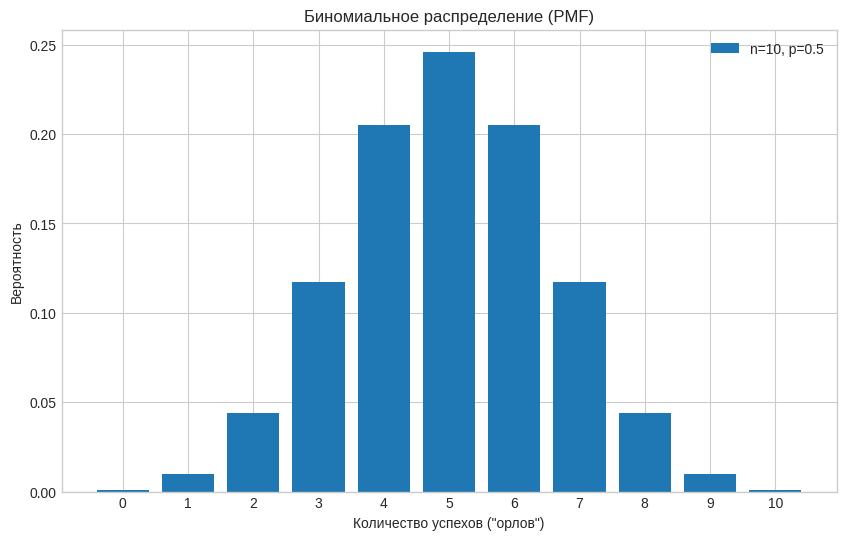

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')

n, p = 10, 0.5  # 10 подбрасываний монетки, вероятность орла 0.5
x = np.arange(0, n+1)
pmf_binom = stats.binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf_binom, label=f'n={n}, p={p}')
plt.title('Биномиальное распределение (PMF)')
plt.xlabel('Количество успехов ("орлов")')
plt.ylabel('Вероятность')
plt.xticks(x)
plt.legend()
plt.show()

**Распределение Пуассона:** Количество событий за фиксированный интервал.
*   `μ` (или `lambda`) - среднее количество событий за интервал.

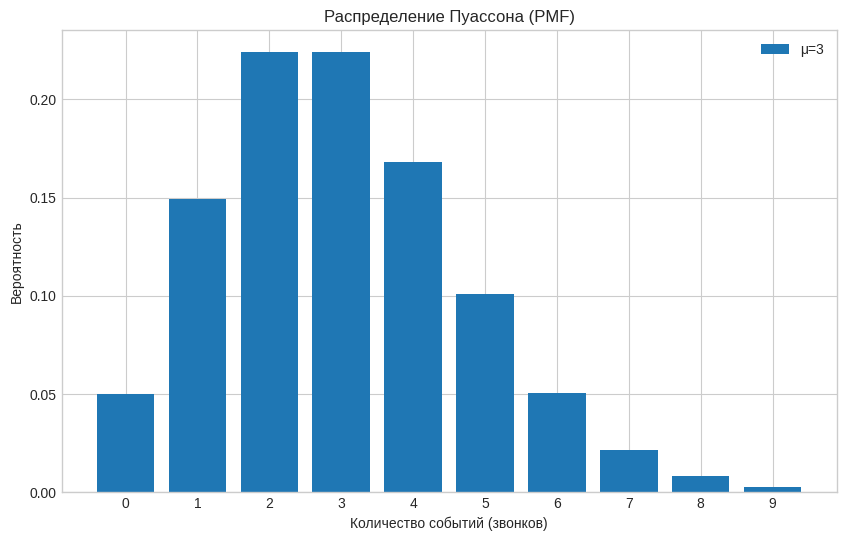

In [2]:
mu = 3 # В среднем 3 звонка в колл-центр за час
x = np.arange(0, 10)
pmf_poisson = stats.poisson.pmf(x, mu)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf_poisson, label=f'μ={mu}')
plt.title('Распределение Пуассона (PMF)')
plt.xlabel('Количество событий (звонков)')
plt.ylabel('Вероятность')
plt.xticks(x)
plt.legend()
plt.show()

### Непрерывные распределения
*   **Равномерное распределение:** Все исходы в некотором диапазоне равновероятны. Пример: время ожидания автобуса, который ходит ровно каждые 15 минут.
*   **Нормальное распределение (Гауссово):** Самое важное распределение в статистике. Оно описывает множество явлений в природе и социуме (рост, вес, ошибки измерений). Его график — симметричный "колокол".
*   **Экспоненциальное распределение:** Описывает время между двумя последовательными событиями в процессе Пуассона. Пример: время до следующего звонка в колл-центр.

Для непрерывных величин мы строим **функцию плотности вероятности (PDF - Probability Density Function)**. Вероятность попадания в интервал равна **площади под кривой** на этом интервале.

**Нормальное распределение (Гауссово):** Самое знаменитое распределение.
*   `loc` - среднее значение (центр колокола).
*   `scale` - стандартное отклонение (ширина колокола).

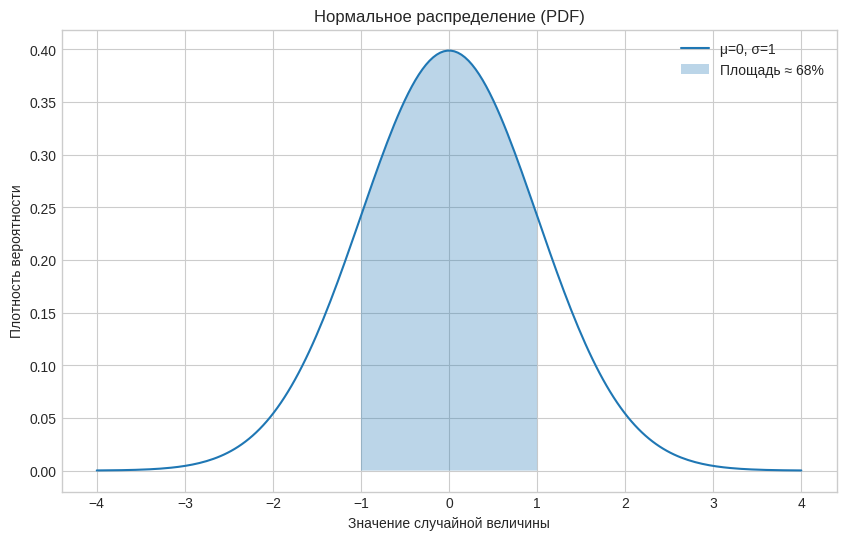

In [3]:
loc, scale = 0, 1 # Среднее 0, ст. отклонение 1 (стандартное нормальное)
x = np.linspace(-4, 4, 200)
pdf_norm = stats.norm.pdf(x, loc, scale)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_norm, label=f'μ={loc}, σ={scale}')
plt.title('Нормальное распределение (PDF)')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')

# Закрасим площадь, соответствующую P(-1 < X < 1)
x_fill = np.linspace(-1, 1, 100)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, loc, scale), alpha=0.3, label='Площадь ≈ 68%')
plt.legend()
plt.show()


**Функция плотности** $f(x)$ используется только для **непрерывных** случайных величин.
Сама по себе $f(x)$ — это НЕ вероятность! Она показывает, в какой области значения случайной величины более "плотные" или вероятные.

**Ключевая идея:** Вероятность попадания величины в некоторый интервал $[a, b]$ равна **площади под графиком** PDF на этом интервале.

$$
P(a \le X \le b) = \int_{a}^{b} f(x) dx
$$

Общая площадь под всем графиком PDF всегда равна 1.

## Функция распределения (CDF)

**Функция распределения (CDF - Cumulative Distribution Function)** показывает "накопленную" вероятность $P(X \le x)$. Она всегда возрастает от 0 до 1. Давайте посмотрим на CDF для нашего нормального распределения.

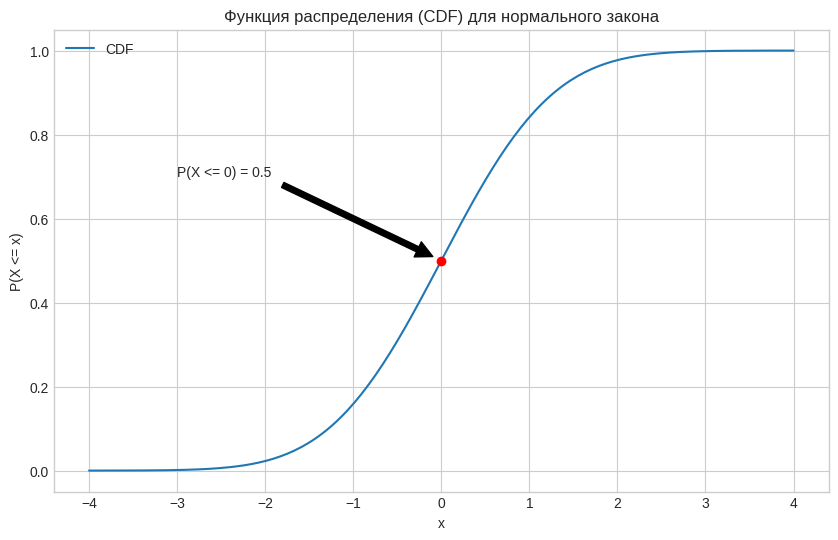

In [4]:
cdf_norm = stats.norm.cdf(x, loc, scale)

plt.figure(figsize=(10, 6))
plt.plot(x, cdf_norm, label='CDF')
plt.title('Функция распределения (CDF) для нормального закона')
plt.xlabel('x')
plt.ylabel('P(X <= x)')

# Отметим точку x=0
plt.plot(0, stats.norm.cdf(0, loc, scale), 'ro')
plt.annotate('P(X <= 0) = 0.5', xy=(0, 0.5), xytext=(-3, 0.7),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.show()


**Функция распределения** $F(x)$ показывает вероятность того, что случайная величина $X$ примет значение, **меньшее или равное** $x$.

$$
F(x) = P(X \le x)
$$

Это "накопленная" вероятность. Это универсальный способ описания как для дискретных, так и для непрерывных величин.